In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from collections import defaultdict
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

In [ ]:
#Helping Functions
def read_data(path):
    return pd.read_csv(path, index_col=0)


In [ ]:
#Train dataset
dataframe=read_data('/content/train.csv')
x_train=dataframe[dataframe.columns.drop('SalePrice')]
y_train=dataframe['SalePrice']
x_train.insert(0, 'x0', np.ones(len(x_train)))
print(x_train.shape)

(1460, 80)


In [ ]:
#Trian Test Split
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.33, random_state=42)
y_train=y_train.to_numpy()
y_train=y_train[:,np.newaxis]
x_train.shape

(978, 80)

In [ ]:
#Label Encoding 
dict1 = defaultdict(LabelEncoder)
x_train = x_train.astype(str).apply(lambda x_train: dict1[x_train.name].fit_transform(x_train))
x_test = x_test.astype(str).apply(lambda x_test: dict1[x_test.name].fit_transform(x_test))
print(x_train.head)

<bound method NDFrame.head of       x0  MSSubClass  MSZoning  ...  YrSold  SaleType  SaleCondition
Id                              ...                                 
616    0          10         3  ...       4         8              0
614    0          14         3  ...       1         6              5
1304   0          14         3  ...       0         8              4
487    0          14         3  ...       1         8              4
562    0          14         3  ...       0         8              4
...   ..         ...       ...  ...     ...       ...            ...
1096   0          14         3  ...       1         8              4
1131   0           5         3  ...       3         8              4
1295   0          14         3  ...       0         8              4
861    0           5         3  ...       1         8              4
1127   0           0         3  ...       3         8              4

[978 rows x 80 columns]>


In [ ]:
#calclate the Theta
first=np.linalg.pinv((x_train.astype(int).T.dot(x_train.astype(int))))

In [ ]:
sec= (x_train.T.dot(y_train))


In [ ]:
Theta=first.dot(sec)
print(Theta.shape)

(80, 1)


In [ ]:
#Model_prediction
y_pred=Theta[0]
for i in range(len(Theta)):
  y_pred=y_pred+Theta[i]*x_test.iloc[:,i]

In [ ]:
# The mean squared error
print('Mean squared error: %.2f' % mean_squared_error(y_test,y_pred))
#R2 Score
print('R2 Score: %.2f' % r2_score(y_test,y_pred))

Mean squared error: 2145557386.30
R2 Score: 0.71


Text(0.5, 1.0, 'First 100 actual and Predicted values')

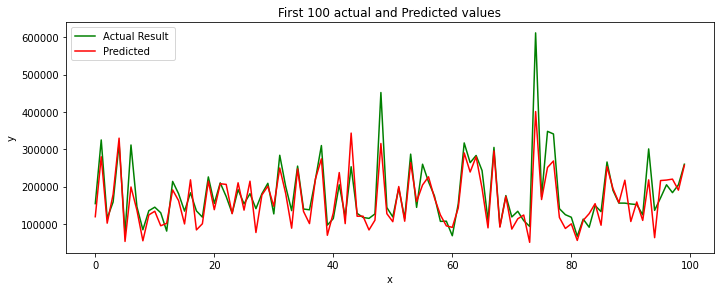

In [ ]:
#Visualization 
fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 1.5, 0.8]) # left, bottom, width, height (range 0 to 1)
axes.plot( np.arange(100),y_test[0:100],'g', label="Actual Result ")
axes.plot( np.arange(100),y_pred[0:100],'r', label="Predicted")

axes.legend(loc=2); # upper left corner
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('First 100 actual and Predicted values')